In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import pygeoj
import geojson
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [6]:
comm_data = pd.read_csv('D:/Dataset Telco/Examples/sms-call-internet-mi-2013-11-01.txt', sep='\t', header=None, names=['SquareID','TimeInterval','CountryCode','SMSin','SMSout','Callin','Callout','Internettraffic'])
prov_data = pd.read_csv('D:/Dataset Telco/Examples/mi-to-provinces-2013-11-01.txt', sep='\t', header=None, names=['SquareID','Province','TimeInterval','Square2Prov','Prov2Square'])
full_data = pd.read_csv('D:/Dataset Telco/Examples/MItoMI-2013-11-01.txt', sep='\t', header=None, names=['TimeInterval','SquareID1','SquareID2','DirectStrength'])
milano_grid = pygeoj.load('D:/Dataset Telco/Examples/milano-grid.geojson')

In [21]:
comm_data['TimeInterval'] = pd.to_datetime(comm_data['TimeInterval']/1000, unit='s')
prov_data['TimeInterval'] = pd.to_datetime(prov_data['TimeInterval']/1000, unit='s')
full_data['TimeInterval'] = pd.to_datetime(full_data['TimeInterval']/1000, unit='s')

In [30]:
comm_data.head()

,SquareID,TimeInterval,CountryCode,SMSin,SMSout,Callin,Callout,Internettraffic
0,1,2013-10-31 23:00:00,0,0.081363,NaN,NaN,NaN,NaN
1,1,2013-10-31 23:00:00,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,2013-10-31 23:10:00,0,0.136588,NaN,NaN,0.027300,NaN
3,1,2013-10-31 23:10:00,33,NaN,NaN,NaN,NaN,0.026137
4,1,2013-10-31 23:10:00,39,0.278452,0.119926,0.188777,0.133637,11.100963


In [8]:
for feature in milano_grid:
    print(feature.geometry.type)
    print(feature.geometry.coordinates)

Polygon
[[[9.0114910478323, 45.35880131440966], [9.014491488013135, 45.35880097314403], [9.0144909480813, 45.35668565341486], [9.011490619692509, 45.356685994655464], [9.0114910478323, 45.35880131440966]]]
Polygon
[[[9.014491488013135, 45.35880097314403], [9.017491928134044, 45.358800553060284], [9.017491276410173, 45.35668523336193], [9.0144909480813, 45.35668565341486], [9.014491488013135, 45.35880097314403]]]
Polygon
[[[9.017491928134044, 45.358800553060284], [9.02049236818262, 45.35880005415845], [9.020491604666724, 45.356684734496675], [9.017491276410173, 45.35668523336193], [9.017491928134044, 45.358800553060284]]]
Polygon
[[[9.02049236818262, 45.35880005415845], [9.023492808146456, 45.35879947643852], [9.023491932838542, 45.35668415681913], [9.020491604666724, 45.356684734496675], [9.02049236818262, 45.35880005415845]]]
Polygon
[[[9.023492808146456, 45.35879947643852], [9.026493248013145, 45.35879881990051], [9.02649226091323, 45.35668350032926], [9.023491932838542, 45.356684156

Polygon
[[[9.080522139642493, 45.373580726312554], [9.083523358193464, 45.37357857112699], [9.08352024463221, 45.371463259077885], [9.080519137959556, 45.37146541410537], [9.080522139642493, 45.373580726312554]]]
Polygon
[[[9.083523358193464, 45.37357857112699], [9.086524576398812, 45.37357633708318], [9.086521350959286, 45.37146102519794], [9.08352024463221, 45.371463259077885], [9.083523358193464, 45.37357857112699]]]
Polygon
[[[9.086524576398812, 45.37357633708318], [9.089525794246113, 45.373574024181124], [9.089522456928368, 45.371458712465525], [9.086521350959286, 45.37146102519794], [9.086524576398812, 45.37357633708318]]]
Polygon
[[[9.089525794246113, 45.373574024181124], [9.09252701172295, 45.37357163242088], [9.092523562527035, 45.3714563208807], [9.089522456928368, 45.371458712465525], [9.089525794246113, 45.373574024181124]]]
Polygon
[[[9.09252701172295, 45.37357163242088], [9.095528228816905, 45.373569161802436], [9.09552466774287, 45.371453850443466], [9.092523562527035, 4

[[[9.077535374593873, 45.384159352633], [9.080537153056184, 45.3841572755441], [9.08053414970676, 45.38204196727171], [9.077532483184925, 45.38204404420826], [9.077535374593873, 45.384159352633]]]
Polygon
[[[9.080537153056184, 45.3841572755441], [9.08353893118506, 45.38415511956799], [9.083535815895209, 45.38203981145374], [9.08053414970676, 45.38204196727171], [9.080537153056184, 45.3841572755441]]]
Polygon
[[[9.08353893118506, 45.38415511956799], [9.086540708968078, 45.384152884704704], [9.086537481737842, 45.382037576754364], [9.083535815895209, 45.38203981145374], [9.08353893118506, 45.38415511956799]]]
Polygon
[[[9.086540708968078, 45.384152884704704], [9.089542486392807, 45.38415057095426], [9.089539147222236, 45.38203526317363], [9.086537481737842, 45.382037576754364], [9.086540708968078, 45.384152884704704]]]
Polygon
[[[9.089542486392807, 45.38415057095426], [9.092544263446817, 45.384148178316686], [9.092540812335963, 45.382032870711534], [9.089539147222236, 45.38203526317363],

[[[9.077549836454574, 45.39473588295263], [9.080552174805709, 45.39473380510183], [9.080549169788664, 45.39261850076419], [9.077546943440161, 45.39262057846259], [9.077549836454574, 45.39473588295263]]]
Polygon
[[[9.080552174805709, 45.39473380510183], [9.083554512823184, 45.39473164833489], [9.083551395803555, 45.392616344155435], [9.080549169788664, 45.39261850076419], [9.080552174805709, 45.39473380510183]]]
Polygon
[[[9.083554512823184, 45.39473164833489], [9.086556850494562, 45.39472941265183], [9.086553621472396, 45.39261410863636], [9.083551395803555, 45.392616344155435], [9.083554512823184, 45.39473164833489]]]
Polygon
[[[9.086556850494562, 45.39472941265183], [9.089559187807408, 45.39472709805267], [9.089555846782751, 45.392611794206964], [9.086553621472396, 45.39261410863636], [9.086556850494562, 45.39472941265183]]]
Polygon
[[[9.089559187807408, 45.39472709805267], [9.092561524749284, 45.394724704537445], [9.09255807172219, 45.39260940086729], [9.089555846782751, 45.39261179

[[[9.19168126540618, 45.40729319807268], [9.194684254595206, 45.40728811919755], [9.194676988688377, 45.40517282966638], [9.191674111573704, 45.40517790816899], [9.19168126540618, 45.40729319807268]]]
Polygon
[[[9.194684254595206, 45.40728811919755], [9.197687242977347, 45.40728296137304], [9.197679864996278, 45.40516767222018], [9.194676988688377, 45.40517282966638], [9.194684254595206, 45.40728811919755]]]
Polygon
[[[9.197687242977347, 45.40728296137304], [9.20069023054016, 45.40727772459921], [9.200682740484961, 45.40516243583045], [9.197679864996278, 45.40516767222018], [9.197687242977347, 45.40728296137304]]]
Polygon
[[[9.20069023054016, 45.40727772459921], [9.203693217271198, 45.4072724088761], [9.203685615141984, 45.40515712049723], [9.200682740484961, 45.40516243583045], [9.20069023054016, 45.40727772459921]]]
Polygon
[[[9.203693217271198, 45.4072724088761], [9.206696203158016, 45.407267014203796], [9.206688488954901, 45.405151726220595], [9.203685615141984, 45.40515712049723],

Polygon
[[[9.077578784273285, 45.41588888457188], [9.08058224333499, 45.41588680519643], [9.080579234979293, 45.413771508728196], [9.077575888044656, 45.41377358795113], [9.077578784273285, 45.41588888457188]]]
Polygon
[[[9.08058224333499, 45.41588680519643], [9.083585702062578, 45.41588464684693], [9.08358258157986, 45.413769350537], [9.080579234979293, 45.413771508728196], [9.08058224333499, 45.41588680519643]]]
Polygon
[[[9.083585702062578, 45.41588464684693], [9.0865891604436, 45.415882409523405], [9.086585927833907, 45.41376711337758], [9.08358258157986, 45.413769350537], [9.083585702062578, 45.41588464684693]]]
Polygon
[[[9.0865891604436, 45.415882409523405], [9.089592618465598, 45.41588009322589], [9.08958927372898, 45.413764797249954], [9.086585927833907, 45.41376711337758], [9.0865891604436, 45.415882409523405]]]
Polygon
[[[9.089592618465598, 45.41588009322589], [9.092596076116124, 45.415877697954386], [9.092592619252628, 45.41376240215414], [9.08958927372898, 45.4137647972499

[[[9.074589250036489, 45.426467357006935], [9.077593270242245, 45.42646535587178], [9.077590372404863, 45.42435006318565], [9.074586464388503, 45.42435206417402], [9.074589250036489, 45.426467357006935]]]
Polygon
[[[9.077593270242245, 45.42646535587178], [9.080597290126118, 45.426463275733575], [9.080594280099389, 45.42434798320002], [9.077590372404863, 45.42435006318565], [9.077593270242245, 45.42646535587178]]]
Polygon
[[[9.080597290126118, 45.426463275733575], [9.08360130967565, 45.426461116592364], [9.083598187459614, 45.42434582421718], [9.080594280099389, 45.42434798320002], [9.080597290126118, 45.426463275733575]]]
Polygon
[[[9.08360130967565, 45.426461116592364], [9.086605328878374, 45.42645887844815], [9.086602094473083, 45.42434358623713], [9.083598187459614, 45.42434582421718], [9.08360130967565, 45.426461116592364]]]
Polygon
[[[9.086605328878374, 45.42645887844815], [9.089609347721835, 45.42645656130098], [9.089606001127335, 45.424341269259905], [9.086602094473083, 45.42434

[[[9.074603182918564, 45.43704380936795], [9.077607764258248, 45.437041807498744], [9.077604864811022, 45.434926518747176], [9.074600395723056, 45.43492852046955], [9.074603182918564, 45.43704380936795]]]
Polygon
[[[9.077607764258248, 45.437041807498744], [9.080612345275831, 45.43703972659751], [9.080609333576929, 45.434924437998575], [9.077604864811022, 45.434926518747176], [9.077607764258248, 45.437041807498744]]]
Polygon
[[[9.080612345275831, 45.43703972659751], [9.083616925958843, 45.43703756666429], [9.08361380200831, 45.43492227822377], [9.080609333576929, 45.434924437998575], [9.080612345275831, 45.43703972659751]]]
Polygon
[[[9.083616925958843, 45.43703756666429], [9.086621506294813, 45.437035327699085], [9.086618270092698, 45.434920039422806], [9.08361380200831, 45.43492227822377], [9.083616925958843, 45.43703756666429]]]
Polygon
[[[9.086621506294813, 45.437035327699085], [9.089626086271272, 45.43703300970194], [9.089622737817624, 45.434917721595674], [9.086618270092698, 45.43

Polygon
[[[9.074617123541422, 45.44762024205644], [9.077622266326786, 45.447618239452915], [9.077619365268612, 45.445502954635906], [9.074614334797335, 45.445504957092545], [9.074617123541422, 45.44762024205644]]]
Polygon
[[[9.077622266326786, 45.447618239452915], [9.08062740878983, 45.447616157788374], [9.080624395417614, 45.44550087312405], [9.077619365268612, 45.445502954635906], [9.077622266326786, 45.447618239452915]]]
Polygon
[[[9.08062740878983, 45.447616157788374], [9.083632550918075, 45.447613997062845], [9.08362942523186, 45.445498712557], [9.080624395417614, 45.44550087312405], [9.08062740878983, 45.447616157788374]]]
Polygon
[[[9.083632550918075, 45.447613997062845], [9.08663769269904, 45.44761175727635], [9.086634454698878, 45.44549647293479], [9.08362942523186, 45.445498712557], [9.083632550918075, 45.447613997062845]]]
Polygon
[[[9.08663769269904, 45.44761175727635], [9.089642834120248, 45.44760943842891], [9.089639483806184, 45.44549415425744], [9.086634454698878, 45.44

Polygon
[[[9.224932480069466, 45.46223013433558], [9.227938377970856, 45.462224175667615], [9.227929854673523, 45.46010891110443], [9.224924069169315, 45.46011486933534], [9.224932480069466, 45.46223013433558]]]
Polygon
[[[9.227938377970856, 45.462224175667615], [9.23094427492511, 45.46221813790022], [9.230935639230722, 45.460102873779896], [9.227929854673523, 45.46010891110443], [9.227938377970856, 45.462224175667615]]]
Polygon
[[[9.23094427492511, 45.46221813790022], [9.233950170919735, 45.46221202103349], [9.233941422828426, 45.46009675736182], [9.230935639230722, 45.460102873779896], [9.23094427492511, 45.46221813790022]]]
Polygon
[[[9.233950170919735, 45.46221202103349], [9.236956065942246, 45.46220582506747], [9.236947205454145, 45.46009056185025], [9.233941422828426, 45.46009675736182], [9.233950170919735, 45.46221202103349]]]
Polygon
[[[9.236956065942246, 45.46220582506747], [9.239961959980151, 45.46219955000223], [9.239952987095393, 45.46008428724527], [9.236947205454145, 45.4

[[[9.22196808758251, 45.472812329242664], [9.224974548592483, 45.472806447517435], [9.22496613301782, 45.47069118645697], [9.221959784467623, 45.47069706775078], [9.22196808758251, 45.472812329242664]]]
Polygon
[[[9.224974548592483, 45.472806447517435], [9.227981008667168, 45.472800486663715], [9.227972480632856, 45.47068522604045], [9.22496613301782, 45.47069118645697], [9.224974548592483, 45.472806447517435]]]
Polygon
[[[9.227981008667168, 45.472800486663715], [9.230987467794069, 45.472794446681554], [9.230978827300238, 45.470679186501314], [9.227972480632856, 45.47068522604045], [9.227981008667168, 45.472800486663715]]]
Polygon
[[[9.230987467794069, 45.472794446681554], [9.23399392596069, 45.47278832757103], [9.23398517300747, 45.47067306783961], [9.230978827300238, 45.470679186501314], [9.230987467794069, 45.472794446681554]]]
Polygon
[[[9.23399392596069, 45.47278832757103], [9.237000383154529, 45.4727821293322], [9.236991517742053, 45.47066687005542], [9.23398517300747, 45.4706730

[[[9.222009617001277, 45.483388624883254], [9.225016640497637, 45.48338274100049], [9.225008220245268, 45.48126748387976], [9.222001309271194, 45.48127336733096], [9.222009617001277, 45.483388624883254]]]
Polygon
[[[9.225016640497637, 45.48338274100049], [9.228023663058073, 45.483376777960196], [9.228015130283548, 45.48126152127685], [9.225008220245268, 45.48126748387976], [9.225016640497637, 45.48338274100049]]]
Polygon
[[[9.228023663058073, 45.483376777960196], [9.231030684670078, 45.48337073576244], [9.231022039373526, 45.48125547952228], [9.228015130283548, 45.48126152127685], [9.228023663058073, 45.483376777960196]]]
Polygon
[[[9.231030684670078, 45.48337073576244], [9.234037705321144, 45.4833646144073], [9.234028947502695, 45.481249358616125], [9.231022039373526, 45.48125547952228], [9.231030684670078, 45.48337073576244]]]
Polygon
[[[9.234037705321144, 45.4833646144073], [9.237044724998768, 45.48335841389483], [9.237035854658556, 45.481243158558456], [9.234028947502695, 45.481249

Polygon
[[[9.222051169505482, 45.49396490082601], [9.2250587558009, 45.49395901478489], [9.225050330867631, 45.4918437616039], [9.222042857157048, 45.491849647213286], [9.222051169505482, 45.49396490082601]]]
Polygon
[[[9.2250587558009, 45.49395901478489], [9.228066341159755, 45.49395304955722], [9.228057803641779, 45.491837796813776], [9.225050330867631, 45.4918437616039], [9.2250587558009, 45.49395901478489]]]
Polygon
[[[9.228066341159755, 45.49395304955722], [9.231073925569529, 45.49394700514305], [9.231065275466976, 45.49183175284295], [9.228057803641779, 45.491837796813776], [9.228066341159755, 45.49395304955722]]]
Polygon
[[[9.231073925569529, 45.49394700514305], [9.234081509017713, 45.49394088154246], [9.234072746330712, 45.49182562969151], [9.231065275466976, 45.49183175284295], [9.231073925569529, 45.49394700514305]]]
Polygon
[[[9.234081509017713, 45.49394088154246], [9.237089091491784, 45.4939346787555], [9.237080216220471, 45.491819427359516], [9.234072746330712, 45.49182562

Polygon
[[[9.22209274511089, 45.50454115707107], [9.22510089451825, 45.50453526887081], [9.225092464900886, 45.502420019629504], [9.222084428140956, 45.502425907397864], [9.22209274511089, 45.50454115707107]]]
Polygon
[[[9.22510089451825, 45.50453526887081], [9.228109042988406, 45.504529301454944], [9.22810050072374, 45.50241405265134], [9.225092464900886, 45.502420019629504], [9.22510089451825, 45.50453526887081]]]
Polygon
[[[9.228109042988406, 45.504529301454944], [9.231117190508837, 45.50452325482353], [9.231108535596997, 45.50240800646344], [9.22810050072374, 45.50241405265134], [9.228109042988406, 45.504529301454944]]]
Polygon
[[[9.231117190508837, 45.50452325482353], [9.234125337067013, 45.50451712897665], [9.234116569508135, 45.50240188106588], [9.231108535596997, 45.50240800646344], [9.231117190508837, 45.50452325482353]]]
Polygon
[[[9.234125337067013, 45.50451712897665], [9.237133482650416, 45.50451092391436], [9.23712460244463, 45.502395676458725], [9.234116569508135, 45.5024

[[[9.06869676086197, 45.52165849776924], [9.071705843124162, 45.52165664854637], [9.071703156262275, 45.51954139098151], [9.068694186752019, 45.51954324006874], [9.06869676086197, 45.52165849776924]]]
Polygon
[[[9.071705843124162, 45.52165664854637], [9.074714925087566, 45.5216547200592], [9.074712125473786, 45.519539462635805], [9.071703156262275, 45.51954139098151], [9.071705843124162, 45.52165664854637]]]
Polygon
[[[9.074714925087566, 45.5216547200592], [9.077724006739643, 45.52165271230778], [9.077721094374011, 45.51953745503164], [9.074712125473786, 45.519539462635805], [9.074714925087566, 45.5216547200592]]]
Polygon
[[[9.077724006739643, 45.52165271230778], [9.080733088067856, 45.5216506252921], [9.080730062950414, 45.51953536816905], [9.077721094374011, 45.51953745503164], [9.077724006739643, 45.52165271230778]]]
Polygon
[[[9.080733088067856, 45.5216506252921], [9.083742169059663, 45.521648459012205], [9.08373903119046, 45.519533202048045], [9.080730062950414, 45.51953536816905]

[[[9.219207769143084, 45.53627562300126], [9.22221761069228, 45.53626980762163], [9.222209279838872, 45.53415456976681], [9.21919955112527, 45.53416038471988], [9.219207769143084, 45.53627562300126]]]
Polygon
[[[9.22221761069228, 45.53626980762163], [9.225227451314899, 45.53626391293911], [9.225219007626025, 45.534148675516676], [9.222209279838872, 45.53415456976681], [9.22221761069228, 45.53626980762163]]]
Polygon
[[[9.225227451314899, 45.53626391293911], [9.228237290998392, 45.53625793895379], [9.228228734474179, 45.53414270196954], [9.225219007626025, 45.534148675516676], [9.225227451314899, 45.53626391293911]]]
Polygon
[[[9.228237290998392, 45.53625793895379], [9.231247129730209, 45.53625188566571], [9.231238460370786, 45.53413664912547], [9.228228734474179, 45.53414270196954], [9.228237290998392, 45.53625793895379]]]
Polygon
[[[9.231247129730209, 45.53625188566571], [9.234256967497798, 45.53624575307495], [9.234248185303299, 45.53413051698455], [9.231238460370786, 45.5341366491254

Polygon
[[[9.06873540688317, 45.553387268858295], [9.071746181929964, 45.55338541759961], [9.071743490581957, 45.551270171837146], [9.068732828475355, 45.55127202296004], [9.06873540688317, 45.553387268858295]]]
Polygon
[[[9.071746181929964, 45.55338541759961], [9.074756956677357, 45.55338348698936], [9.074754152389199, 45.55126824136851], [9.071743490581957, 45.551270171837146], [9.071746181929964, 45.55338541759961]]]
Polygon
[[[9.074756956677357, 45.55338348698936], [9.07776773111278, 45.553381477027585], [9.077764813884517, 45.55126623155417], [9.074754152389199, 45.55126824136851], [9.074756956677357, 45.55338348698936]]]
Polygon
[[[9.07776773111278, 45.553381477027585], [9.080778505223675, 45.55337938771431], [9.080775475055347, 45.551264142394146], [9.077764813884517, 45.55126623155417], [9.07776773111278, 45.553381477027585]]]
Polygon
[[[9.080778505223675, 45.55337938771431], [9.083789278997477, 45.553377219049544], [9.083786135889131, 45.55126197388845], [9.080775475055347, 45

Polygon
[[[9.219331149163661, 45.56800410268041], [9.222342684753677, 45.56799828089859], [9.222334339988292, 45.56588305486188], [9.219322917422296, 45.56588887621667], [9.219331149163661, 45.56800410268041]]]
Polygon
[[[9.222342684753677, 45.56799828089859], [9.22535421941521, 45.56799237972659], [9.225345761625935, 45.56587715412274], [9.222334339988292, 45.56588305486188], [9.222342684753677, 45.56799828089859]]]
Polygon
[[[9.22535421941521, 45.56799237972659], [9.228365753135687, 45.56798639916447], [9.228357182322652, 45.5658711739993], [9.225345761625935, 45.56587715412274], [9.22535421941521, 45.56799237972659]]]
Polygon
[[[9.228365753135687, 45.56798639916447], [9.231377285902534, 45.5679803392123], [9.231368602065865, 45.565865114491636], [9.228357182322652, 45.5658711739993], [9.228365753135687, 45.56798639916447]]]
Polygon
[[[9.231377285902534, 45.5679803392123], [9.234388817703175, 45.56797419987015], [9.234380020843007, 45.5658589755998], [9.231368602065865, 45.5658651144

In [21]:
with open("D:/Dataset Telco/Examples/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

<Figure size 432x288 with 0 Axes>

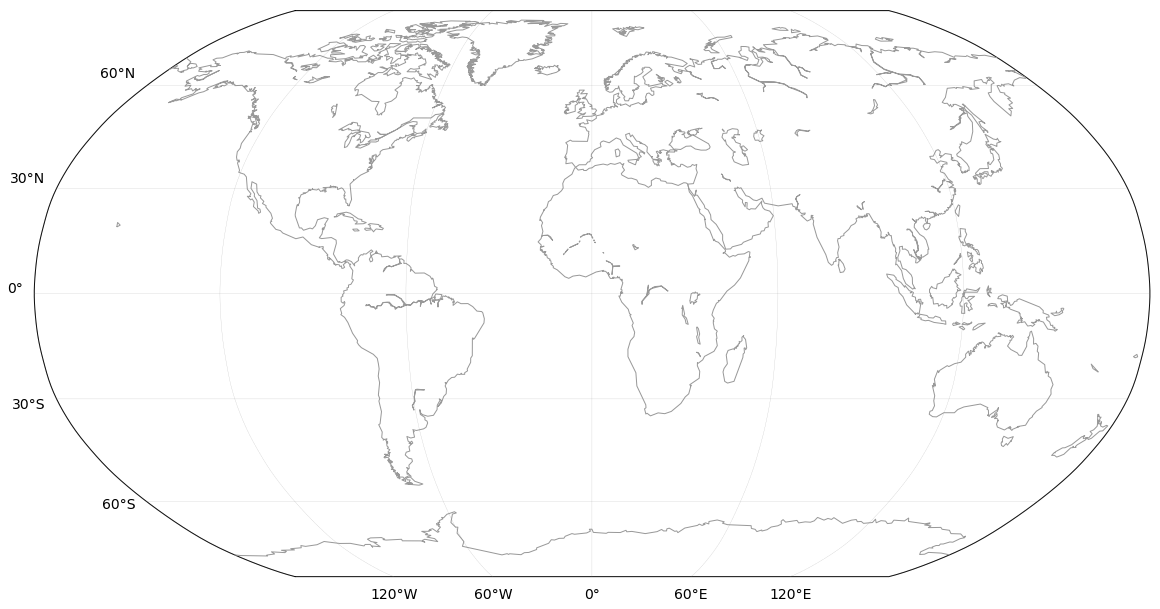

In [37]:
plt.clf()
ax = plt.figure(figsize=(20,20)).add_subplot(111)#fig.gca()
 
m = Basemap(projection='robin', lon_0=0,resolution='c')
m.drawmapboundary(fill_color='white', zorder=-1)
m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize=14)
m.drawmeridians(np.arange(0., 360., 60.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize=14)
m.drawcoastlines(color='0.6', linewidth=1)

In [30]:
json_data.features[1]['geometry']['coordinates']

[[[9.014491488013135, 45.35880097314403],
  [9.017491928134044, 45.358800553060284],
  [9.017491276410173, 45.35668523336193],
  [9.0144909480813, 45.35668565341486],
  [9.014491488013135, 45.35880097314403]]]

In [31]:
for i in range(2799):
    coordlist = json_data.features[i]['geometry']['coordinates'][0]
    if i < 2796:
        name = json_data.features[i]['properties']['cellId']
 
    for j in range(len(coordlist)):
        for k in range(len(coordlist[j])):
            coordlist[j][k][0],coordlist[j][k][1]=m(coordlist[j][k][0],coordlist[j][k][1])
 
    poly = {"type":"Polygon","coordinates":coordlist}#coordlist
    ax.add_patch(PolygonPatch(poly, fc=[0,0.5,0], ec=[0,0.3,0], zorder=0.2 ))
 
ax.axis('scaled')
plt.draw()
plt.show()

NameError: name 'PolygonPatch' is not defined